In [3]:
using Plots
using WAV
using FFTW

In [6]:
function change_speed(sound, fs, speed, file_name)
    wavwrite(sound, file_name, Fs = fs * speed)
    sound_speeded, fs_speeded = wavread(file_name)
    return sound_speeded, fs_speeded
end

change_speed (generic function with 1 method)

In [7]:
sound, fs = wavread("mowa.wav")

([0.0 0.0; 0.0 0.0; … ; 0.0003967406231879635 0.0003967406231879635; 0.0006103701895199438 0.0006103701895199438], 22050.0f0, 0x0010, WAVChunk[WAVChunk(Symbol("fmt "), UInt8[0x10, 0x00, 0x00, 0x00, 0x01, 0x00, 0x02, 0x00, 0x22, 0x56, 0x00, 0x00, 0x88, 0x58, 0x01, 0x00, 0x04, 0x00, 0x10, 0x00]), WAVChunk(:LIST, UInt8[0x49, 0x4e, 0x46, 0x4f, 0x49, 0x53, 0x46, 0x54, 0x0e, 0x00  …  0x35, 0x38, 0x2e, 0x34, 0x35, 0x2e, 0x31, 0x30, 0x30, 0x00])])

In [13]:
@time wavplay("mowa.wav")

  4.283830 seconds (435.26 k allocations: 11.426 MiB)


In [33]:
N = length(sound[:, 1])
time = LinRange(0, (N-1)/fs, N)
speed = 2

2

In [34]:
sound_speeded, fs_speeded = change_speed(sound, fs, speed, "mowa_speeded.wav")

([0.0 0.0; 0.0 0.0; … ; 0.00039674062281847 0.00039674062281847; 0.0006103701889514923 0.0006103701889514923], 44100.0f0)

In [39]:
N_speeded = length(sound_speeded[:, 1])
time_speeded = LinRange(0, (N_speeded-1)/(fs*speed), N_speeded)

82556-element LinRange{Float32}:
 0.0,2.26757f-5,4.53515f-5,6.80272f-5,…,1.8719,1.87193,1.87195,1.87197,1.872

In [40]:
@time wavplay("mowa_speeded.wav")

  2.343574 seconds (165.23 k allocations: 7.306 MiB)


In [90]:
plot(time, sound[:, 1], linecolor=:skyblue3, xlabel = "time", ylabel = "amplitude", label = "normal")
plot!(time_speeded, sound_speeded[:, 1], label = "speeded")

In [54]:
freq = LinRange(0, (N-1)*fs/N, N)[1:Int(N/2+1)]
freq_speeded = LinRange(0, (N_speeded - 1) * fs * speed/N_speeded, N_speeded)[1:Int(N_speeded/2 + 1)]

41279-element LinRange{Float32}:
 0.0,0.534183,1.06837,1.60255,2.13673,…,22048.4,22048.9,22049.5,22050.0

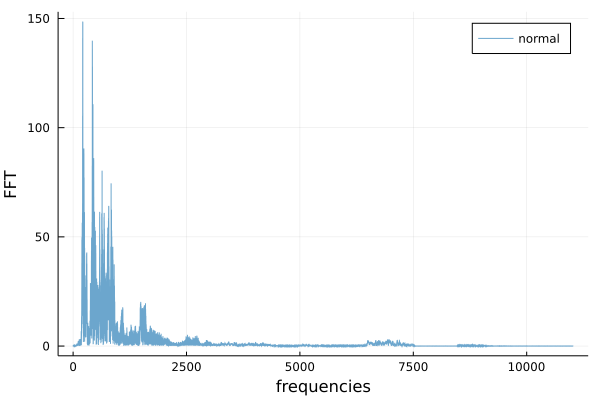

In [89]:
plot(freq, abs.(fft(sound[:, 1]))[1:Int(N/2 + 1)], 
    linecolor = :skyblue3, 
    xlabel = "frequencies",
    ylabel = "FFT",
    label = "normal")

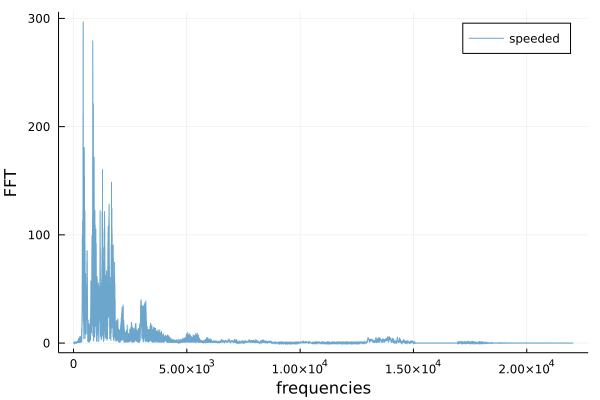

In [88]:
plot(freq_speeded, abs.(fft(sound_speeded)[1:Int(N_speeded/2 + 1)]), 
    linecolor=:skyblue3, 
    xlabel="frequencies", 
    ylabel="FFT",
    label = "speeded")